# **INTRODUCTION**

Suicide is a significant public health concern, with a complex interplay of various socioeconomic factors contributing to its prevalence. Understanding the relationship between these factors and suicide rates is crucial for developing effective prevention strategies. Socio-economic factors play a relevant role in the explanation of suicide rates, with studies showing a connection between suicide and factors like at-risk-of-poverty rates, annual growth rates for industry, and healthcare expenditures. Unemployment has been identified as a significant risk factor for suicide, but the impact of education and income level is less consistent.

# **DATA ANALYSIS**

In [1]:
!pip install bar_chart_race geopandas --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.5 MB/s eta 0:00:00


Import Python libraries used for data analysis, visualization, and mapping, then sets the seaborn plotting style to 'whitegrid' for aesthetic reasons, and finally disables warnings to avoid cluttering the output with warning messages.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import bar_chart_race as bcr

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')
import os

df = pd.read_csv("/content/age_std_suicide_rates_1990-2022.csv")
df = pd.read_csv("/content/suicide_rates_1990-2022.csv")

In [5]:
df.shape

(118560, 18)

In [6]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
3,EU,Europe,ALB,Albania,1992,Male,0-14 years,Generation Alpha,0.0,0.000000,0.000000,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315
4,EU,Europe,ALB,Albania,1992,Male,15-24 years,Generation Z,5.0,3.401361,3.531073,3247039.0,652174990.8,200.85222,906184212.3,1740.0,226.005421,45.315


In [7]:
df.tail()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,AgeGroup,Generation,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
118555,NAC,North America and the Caribbean,USA,United States of America,2021,Female,55-74 years,Baby Boomers,420.0,0.246321,5.286824,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118556,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,276.0,0.146324,4.876199,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118557,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,158.0,0.075728,4.203972,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118558,NAC,North America and the Caribbean,USA,United States of America,2021,Female,75+ years,Silent Generation,127.0,0.022409,2.931077,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946
118559,NAC,North America and the Caribbean,USA,United States of America,2021,Female,Unknown,Unknown,0.0,0.000000,NaN,332031554.0,2.331510e+13,70219.47245,2.370530e+13,71130.0,4.697859,57.946


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [9]:
df.select_dtypes(exclude=np.number).columns

Index(['RegionCode', 'RegionName', 'CountryCode', 'CountryName', 'Sex',
       'AgeGroup', 'Generation'],
      dtype='object')

In [10]:
df.select_dtypes(include=np.number).columns

Index(['Year', 'SuicideCount', 'CauseSpecificDeathPercentage',
       'DeathRatePer100K', 'Population', 'GDP', 'GDPPerCapita',
       'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
       'EmploymentPopulationRatio'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,118560.0,2.005740e+03,8.745003e+00,1.990000e+03,1.999000e+03,2.006000e+03,2.013000e+03,2.022000e+03
SuicideCount,118096.0,6.363204e+01,2.540954e+02,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,6.787000e+03
CauseSpecificDeathPercentage,114271.0,3.873690e+00,7.317820e+00,0.000000e+00,0.000000e+00,5.861665e-01,4.355646e+00,1.000000e+02
DeathRatePer100K,107896.0,1.229979e+01,2.101617e+01,0.000000e+00,0.000000e+00,4.452366e+00,1.538462e+01,5.025126e+02
Population,112640.0,2.456184e+07,4.531156e+07,4.054200e+04,2.613805e+06,6.888434e+06,2.533364e+07,3.320316e+08
GDP,111320.0,4.883351e+11,1.653252e+12,2.197630e+08,1.162585e+10,6.268216e+10,3.013550e+11,2.331510e+13
GDPPerCapita,111320.0,1.742351e+04,1.933214e+04,6.023512e+01,3.941599e+03,9.708141e+03,2.519727e+04,1.337118e+05
GrossNationalIncome,108600.0,4.976795e+11,1.689591e+12,2.082832e+08,1.176795e+10,5.987715e+10,3.057210e+11,2.370530e+13
GNIPerCapita,107800.0,2.214722e+04,1.888640e+04,7.800000e+02,8.670000e+03,1.615000e+04,2.953000e+04,1.526300e+05
InflationRate,104100.0,2.028646e+01,1.630999e+02,-1.063010e+01,1.498961e+00,3.038888e+00,6.536199e+00,4.734914e+03


In [12]:
df.describe(exclude=np.number).T

,count,unique,top,freq
RegionCode,118560,6,EU,45140
RegionName,118560,6,Europe,45140
CountryCode,118560,117,ARG,1740
CountryName,118560,117,Argentina,1740
Sex,118560,3,Male,58320
AgeGroup,118560,7,0-14 years,23712
Generation,118560,7,Generation Alpha,23712


# **DATA CLEANING**

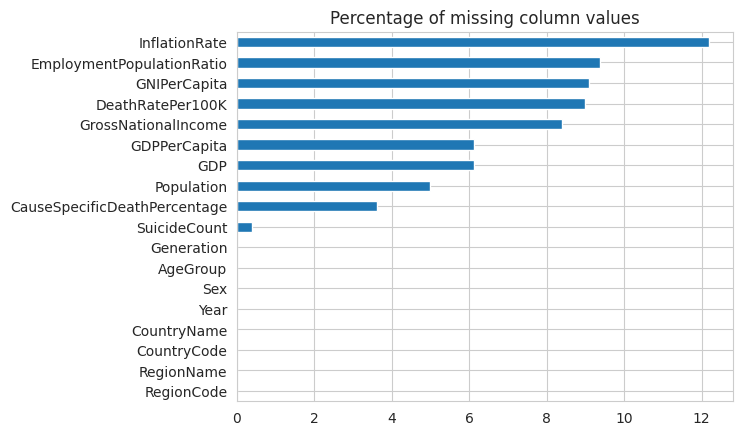

In [13]:
#Calculate the percentage of missing values in each column
missing_percent_threshold = 20
missing_percentages = df.isna().sum() * 100 / len(df)
missing_percentages = round(missing_percentages, 2)

# Sort missing percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

# Plot a bar chart showing the percentage of missing values for each column
missing_percentages_sorted.plot(kind='barh', title="Percentage of missing column values")

# Drop columns with missing value percentage exceeding the threshold
for column, missing_percentage in missing_percentages_sorted.items():
    if missing_percentage > missing_percent_threshold:
        df.drop(columns=column, inplace=True)

Calculates the percentage of missing values for each column in the DataFrame, sort these percentages, and visualize them through a horizontal bar chart. Remove columns where the percentage of missing values exceeds the specified threshold. Specifically, we:

1. Calculate the percentage of missing (NaN) values in each column of the DataFrame df and round these percentages to two decimal places.
2. Sort these missing value percentages in ascending order.
3. Plot a horizontal bar chart showing the percentage of missing values for each column.
4. Iterate through these sorted percentages, removing any column from df where the missing value percentage exceeds a pre-defined threshold (20% in this case).

# **DATA VISUALIZATION**

Key performance indicators (KPIs) related to global suicide data and economic factors. We begin by calculating various statistics from the dataset, including the total number of suicides (in millions), the average number of suicides per 100,000 people, average Gross Domestic Product (GDP) (in billions of dollars), GDP per capita, the year with the highest and lowest suicide rates (excluding the year 2022), and the generation with the highest suicide rates.

In [14]:
from IPython.display import HTML

total_suicides = df['SuicideCount'].sum() / 1e6 # Millions
total_suicides_per_100k = df['DeathRatePer100K'].mean()

# Calculate average GDP and GDP per Capita
average_gdp = df['GDP'].mean()
average_gdp_billion = average_gdp / 1e9  # Convert to billions of dollars
average_gdp_per_capita = df['GDPPerCapita'].mean()

# Calculate the year with the highest and lowest suicide rates, excluding 2022
highest_suicide_year = df[df['Year'] != 2022].groupby('Year')['DeathRatePer100K'].sum().idxmax()
lowest_suicide_year = df[df['Year'] != 2022].groupby('Year')['DeathRatePer100K'].sum().idxmin()

# Calculate the generation with the highest suicide rates
generation_with_highest_suicide = df.groupby('Generation')['DeathRatePer100K'].sum().idxmax()


css_styles = """
<style>
.icon {
  float: right;
  font-size: 500%;
  position: absolute;
  top: 0rem;
  right: -0.3rem;
  opacity: 0.16;
}

#container {
  width: 100%;
  max-width: 1200px;
  display: flex;
  flex-wrap: wrap;
}

.kpi-card {
  overflow: hidden;
  position: relative;
  box-shadow: 1px 1px 3px rgba(0, 0, 0, 0.75);
  display: inline-block;
  padding: 1em;
  border-radius: 0.3em;
  font-family: sans-serif;
  width: calc(25% - 1em);
  min-width: 180px;
  margin: 0.5em;
}

.card-value {
  display: block;
  font-size: 200%;
  font-weight: bold;
}

.card-text {
  display: block;
  font-size: 70%;
  padding-left: 0.2em;
}

.orange {
  background: #ffc241;
  color: #fff;
}

.purple {
  background: #886ab5;
  color: #fff;
}

.grey-dark {
  background: #495057;
  color: #efefef;
}

.red {
  background: #a83b3b;
  color: #fff;
}
</style>
"""

html_code = f"""
<div id="container">
  <div class="kpi-card orange">
    <span class="card-value">{total_suicides:,.2f}M </span>
    <span class="card-text">Total Suicides</span>
    <i class="fas fa-skull-crossbones icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{total_suicides_per_100k:,.0f} </span>
    <span class="card-text">Average Suicides per 100k</span>
    <i class="fas fa-user-alt-slash icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">${average_gdp_billion:.2f}B </span>
    <span class="card-text">Average GDP</span>
    <i class="fas fa-chart-line icon"></i>
  </div>

  <div class="kpi-card red">
    <span class="card-value">{average_gdp_per_capita:,.0f} </span>
    <span class="card-text">GDP per Capita</span>
    <i class="fas fa-money-bill-alt icon"></i>
  </div>

  <div class="kpi-card orange">
    <span class="card-value">{highest_suicide_year} </span>
    <span class="card-text">Year with Highest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card purple">
    <span class="card-value">{lowest_suicide_year} </span>
    <span class="card-text">Year with Lowest Suicide Rates</span>
    <i class="fas fa-calendar-alt icon"></i>
  </div>

  <div class="kpi-card grey-dark">
    <span class="card-value">{generation_with_highest_suicide} </span>
    <span class="card-text">Generation with Highest Suicide Rates</span>
    <i class="fas fa-user icon"></i>
  </div>
</div>
"""

HTML(css_styles + html_code)

Visualize the trends in suicide counts and suicide rates per 100k population over the years using the dataset. We create a dual subplot layout with the first plot displaying the total suicide counts and the second plot showing the suicide rates per 100k population year-wise.

1. **Calculating Year-wise Totals for Suicides and Rates per 100k:** Group the data by 'Year' and sum up the 'SuicideCount' and 'DeathRatePer100K' for each year, then resetting the index to ensure the year column is not used as an index.
2. **Setting Up Subplots:** Set up a 1x2 subplot layout (one row, two columns) sized 16x6, creating a space to plot both datasets side by side.
3. **Creating the First Plot (Total Suicides Trend):**
    *   Use Seaborn's lineplot function to plot the year-wise total suicide counts on the first subplot.
    *   A trendline (regression line) is added using sns.regplot to indicate the general trend of suicide counts over the years.
    *   Annotations are added to highlight the year with the maximum and minimum suicide count, alongside drawing arrows to these points for visual emphasis.
    *   The plot is titled "Total Suicides Trend" and axes labels are set for clarity.
4. **Creating the Second Plot (Suicides per 100k Population Trend):**
    *   Similarly, the second subplot visualizes the year-wise suicide rates per 100k population using Seaborn's lineplot.
    *   It annotates this plot as well to highlight the years with the highest and lowest suicide rates per 100k population, also with arrows for emphasis.
    *   A trendline is added as before to show the overall trend.
    *   The plot is titled "Suicides per 100k Population Trend" and axes labels are set accordingly.

Finally, plt.tight_layout() adjusts the spacing around the subplots for a better fit and plt.show() displays the visualizations.

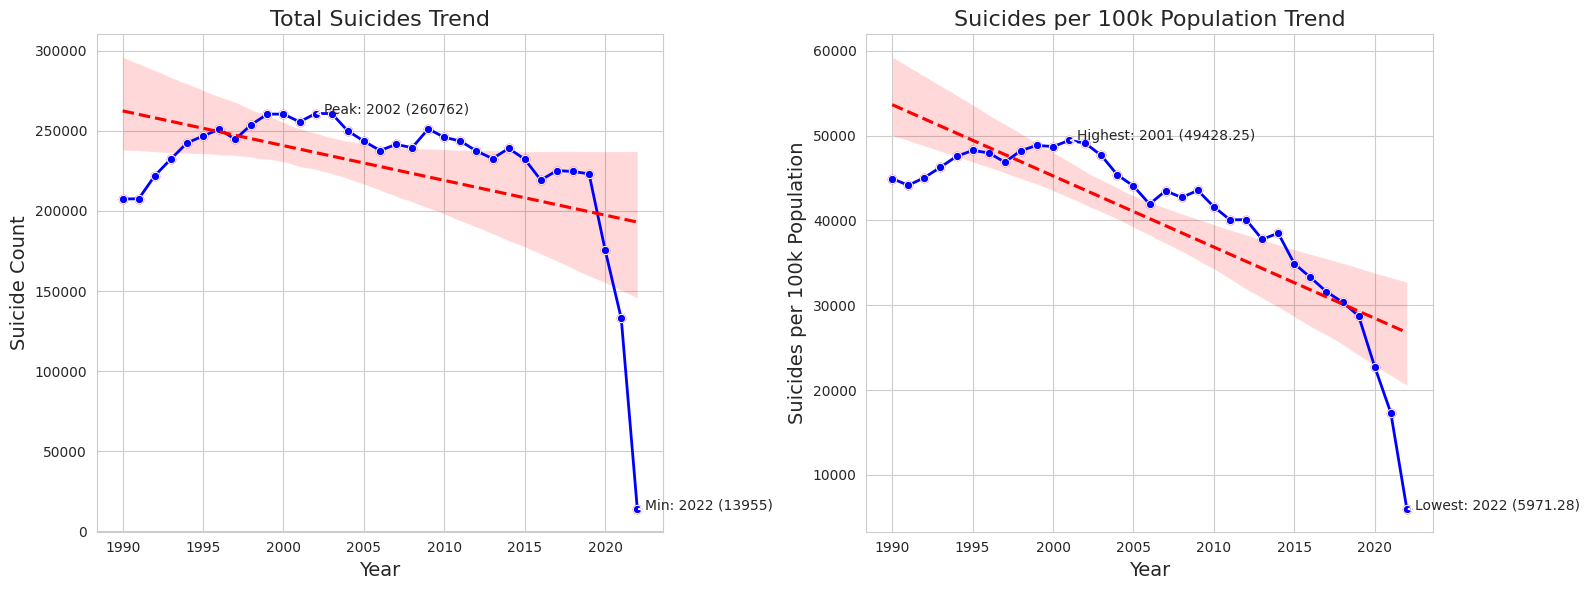

In [15]:
# Get year-wise totals
year_totals_count = df.groupby('Year')['SuicideCount'].sum().reset_index()
year_totals_rate = df.groupby('Year')['DeathRatePer100K'].sum().reset_index()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define a consistent color palette
palette = 'Set1'  # Adjust palette as needed

# Plot for Suicides Count
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year',
    y='SuicideCount',
    data=year_totals_count,
    marker='o',
    color='blue',
    ax=axes[0],
    linewidth=2  # Adjust line width
)

# Annotate peak year
max_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].max()]
min_year = year_totals_count[year_totals_count['SuicideCount'] == year_totals_count['SuicideCount'].min()]
axes[0].annotate(
    f"Peak: {max_year['Year'].values[0]} ({max_year['SuicideCount'].values[0]:.0f})",
    xy=(max_year['Year'].values[0], max_year['SuicideCount'].values[0]),
    xytext=(max_year['Year'].values[0] + 0.5, max_year['SuicideCount'].values[0] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[0].annotate(
    f"Min: {min_year['Year'].values[0]} ({min_year['SuicideCount'].values[0]:.0f})",
    xy=(min_year['Year'].values[0], min_year['SuicideCount'].values[0]),
    xytext=(min_year['Year'].values[0] + 0.5, min_year['SuicideCount'].values[0] - 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='SuicideCount', data=year_totals_count, ax=axes[0], color='r', line_kws={'linestyle':'--'})

axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicide Count", fontsize=14)
axes[0].set_title("Total Suicides Trend", fontsize=16)

# Plot for Suicides per 100k Population
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year',
    y='DeathRatePer100K',
    data=year_totals_rate,
    marker='o',
    color='blue',
    ax=axes[1],
    linewidth=2  # Adjust line width
)

# Highlight and annotate years with highest and lowest rates
highest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].max()]
lowest_rate_year = year_totals_rate[year_totals_rate['DeathRatePer100K'] == year_totals_rate['DeathRatePer100K'].min()]

axes[1].annotate(
    f"Highest: {highest_rate_year['Year'].values[0]} ({highest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(highest_rate_year['Year'].values[0], highest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(highest_rate_year['Year'].values[0] + 0.5, highest_rate_year['DeathRatePer100K'].values[0] + 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

axes[1].annotate(
    f"Lowest: {lowest_rate_year['Year'].values[0]} ({lowest_rate_year['DeathRatePer100K'].values[0]:.2f})",
    xy=(lowest_rate_year['Year'].values[0], lowest_rate_year['DeathRatePer100K'].values[0]),
    xytext=(lowest_rate_year['Year'].values[0] + 0.5, lowest_rate_year['DeathRatePer100K'].values[0] - 1),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

# Add trendline
sns.regplot(x='Year', y='DeathRatePer100K', data=year_totals_rate, ax=axes[1], color='r', line_kws={'linestyle':'--'})

axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides per 100k Population Trend", fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

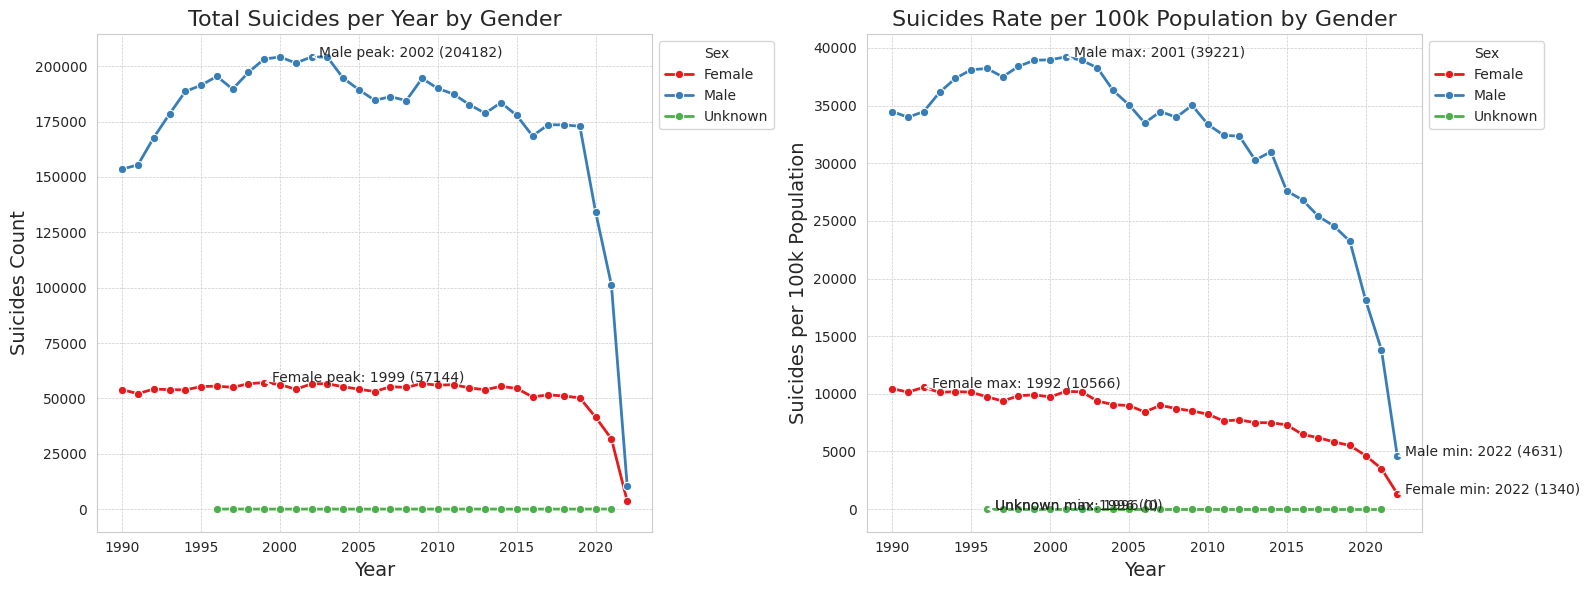

In [16]:
# Get year-wise totals by gender
gender_totals = df.groupby(['Year', 'Sex']).agg({'SuicideCount': 'sum', 'DeathRatePer100K': 'sum'}).reset_index()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define consistent style parameters
palette = 'Set1'
line_width = 2

# Plot for Suicides Count (stacked)
sns.set_style('whitegrid')
lineplot_count = sns.lineplot(
    x='Year', y='SuicideCount', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[0], linewidth=line_width
)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Suicides Count", fontsize=14)
axes[0].set_title("Total Suicides per Year by Gender", fontsize=16)

# Plot for Suicides per 100k Population (stacked)
sns.set_style('whitegrid')
lineplot_rate = sns.lineplot(
    x='Year', y='DeathRatePer100K', hue='Sex', data=gender_totals,
    marker='o', palette=palette, ax=axes[1], linewidth=line_width
)
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides Rate per 100k Population by Gender", fontsize=16)

# Annotate significant increases/decreases for each gender in the Suicides Count plot
threshold = 100  # Adjust as needed
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'SuicideCount')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'SuicideCount')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_count = max_years_gender.iloc[0]['SuicideCount']
    min_count = min_years_gender.iloc[0]['SuicideCount']
    if max_count - min_count >= threshold:
        axes[0].annotate(f"{gender} peak: {max_year} ({max_count:.0f})", xy=(max_year, max_count),
                        xytext=(max_year + 0.5, max_count + 50), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Annotate maximum and minimum peaks for each gender in the Suicides Rate per 100k Population plot
for gender in gender_totals['Sex'].unique():
    max_years_gender = gender_totals[gender_totals['Sex'] == gender].nlargest(1, 'DeathRatePer100K')
    min_years_gender = gender_totals[gender_totals['Sex'] == gender].nsmallest(1, 'DeathRatePer100K')
    max_year = max_years_gender.iloc[0]['Year']
    min_year = min_years_gender.iloc[0]['Year']
    max_rate = max_years_gender.iloc[0]['DeathRatePer100K']
    min_rate = min_years_gender.iloc[0]['DeathRatePer100K']
    axes[1].annotate(f"{gender} max: {max_year} ({max_rate:.0f})", xy=(max_year, max_rate),
                    xytext=(max_year + 0.5, max_rate + 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
    axes[1].annotate(f"{gender} min: {min_year} ({min_rate:.0f})", xy=(min_year, min_rate),
                    xytext=(min_year + 0.5, min_rate - 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set legend outside the plot area
axes[0].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(title="Sex", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust and show plot
for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [18]:
df_standardized = pd.read_csv("/content/age_std_suicide_rates_1990-2022.csv")

In [19]:
# Aggregate the data and pivot it in a single step
df_pivoted_tot = df_standardized.pivot_table(index='Year', columns='CountryName', values='SuicideCount', aggfunc='sum')

# Sum the suicide counts for each country
country_suicide_totals = df_pivoted_tot.sum()

# Get the top 10 countries with the highest total suicide counts
top_10_countries = country_suicide_totals.nlargest(10)

# Filter the DataFrame to include only the top 10 countries
df_top_10 = df_pivoted_tot[top_10_countries.index]

# Convert 'Year' column to string type (if necessary)
df_top_10.index = df_top_10.index.astype(str)

# Display the resulting DataFrame
df_top_10.head()

CountryName,Russian Federation,United States of America,Japan,Germany,Republic of Korea,France,Ukraine,Brazil,Poland,Mexico
Year,,,,,,,,,,
1990,39150.0,30906.0,20088.0,13924.0,3159.0,11403.0,10693.0,4843.0,4970.0,1938.0
1991,39388.0,30810.0,19875.0,14010.0,3069.0,11502.0,10743.0,5182.0,5316.0,2114.0
1992,46125.0,30484.0,20893.0,13458.0,3533.0,11644.0,11731.0,5252.0,5713.0,2246.0
1993,56136.0,31102.0,20516.0,12690.0,4124.0,12251.0,12541.0,5547.0,5624.0,2358.0
1994,61886.0,31142.0,20923.0,12718.0,4212.0,12041.0,13907.0,5931.0,5519.0,2603.0


In [20]:
# Define minimum and maximum years
min_year = df_top_10.index.min()
max_year = df_top_10.index.max()

# Define the period summary function to include min and max years
def period_summary(values, ranks):
    total_suicides = values.sum()
    s = f"Total cases - {total_suicides:,.0f}"
    return {'x': .75, 'y': .05, 's': s, 'size': 8}

# Call bar_chart_race with the updated period summary function and title
bcr.bar_chart_race(df_top_10, filename=None, period_summary_func=period_summary,
                    period_label={'x': 0.75, 'y': 0.1}, perpendicular_bar_func='mean',
                    title=f"Total Suicides by Country ({min_year}-{max_year})")

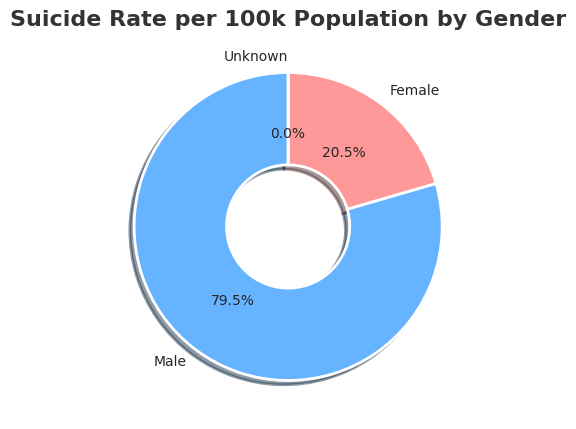

In [22]:
gender_sum = df.groupby('Sex')['DeathRatePer100K'].sum()

# Create a subplot to avoid axis ticks and labels
fig, ax = plt.subplots(figsize=(5, 5))

# Use a more prominent and accessible color palette
colors = ['#ff9999', '#66b3ff', '#cccccc']
labels = ['Female', 'Male', 'Unknown']

# Plot the pie chart with shadow and improved styling
wedgeprops = dict(width=0.6, edgecolor='w', linewidth=2)
ax.pie(
    gender_sum,
    labels=labels,
    autopct='%.1f%%',  # Show one decimal place for percentages
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=wedgeprops,
    shadow=True,
)

# Add title and set font style
ax.set_title(
    'Suicide Rate per 100k Population by Gender',
    fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': '#333333'},
)

# Remove unnecessary axis elements
ax.axis('off')  # Hide all axes

# Show the plot
plt.show()

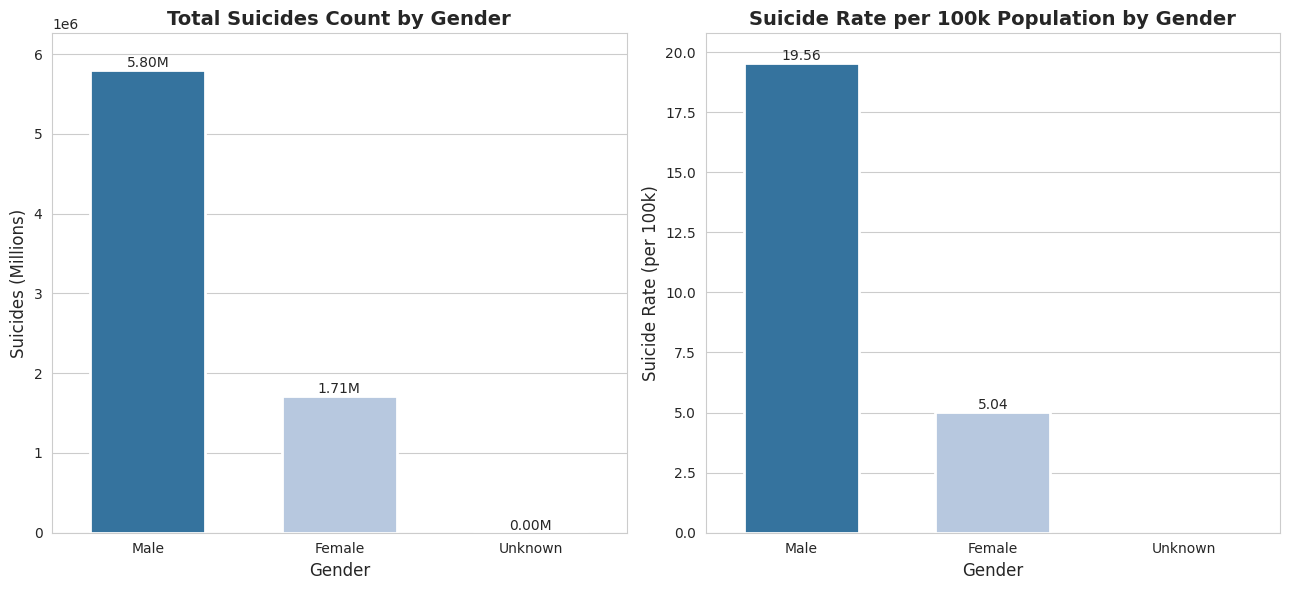

In [23]:
# Set Seaborn style for clean design and sleek UI
sns.set_style("whitegrid")

# Create a figure and subplots with appropriate sizing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

# Define bar width
bar_width = 0.6

# Plot 1: Total Suicides Count by Gender
sns.barplot(
    x="Sex",
    y="SuicideCount",
    data=df,
    ax=axes[0],
    palette="tab20",  # Set color palette
    # Add data labels for clarity
    estimator=lambda x: x.sum(),  # Optional: Calculate total for stacked bars
    errwidth=0,  # Remove error bars if not required
    # Adjust bar width
    linewidth=2,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Add data labels in millions
for p in axes[0].patches:
    label = '{:.2f}M'.format(p.get_height() / 1e6)
    axes[0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Customize title, labels, and layout for readability
axes[0].set_title("Total Suicides Count by Gender", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Gender", fontsize=12)
axes[0].set_ylabel("Suicides (Millions)", fontsize=12)

# Plot 2: Suicide Rate per 100k Population by Gender
sns.barplot(
    x="Sex",
    y="DeathRatePer100K",
    data=df,
    ax=axes[1],
    palette="tab20",  # Set color palette
    # Add data labels for clarity
    estimator=lambda x: x.mean(),  # Optional: Calculate mean for stacked bars
    errwidth=0,  # Remove error bars if not required
    # Adjust bar width
    linewidth=2,
    saturation=0.7,
    capsize=0.1,
    width=bar_width
)

# Add data labels in millions
for p in axes[1].patches:
    label = '{:.2f}'.format(p.get_height())
    axes[1].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Customize title, labels, and layout for readability
axes[1].set_title("Suicide Rate per 100k Population by Gender", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Gender", fontsize=12)
axes[1].set_ylabel("Suicide Rate (per 100k)", fontsize=12)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()

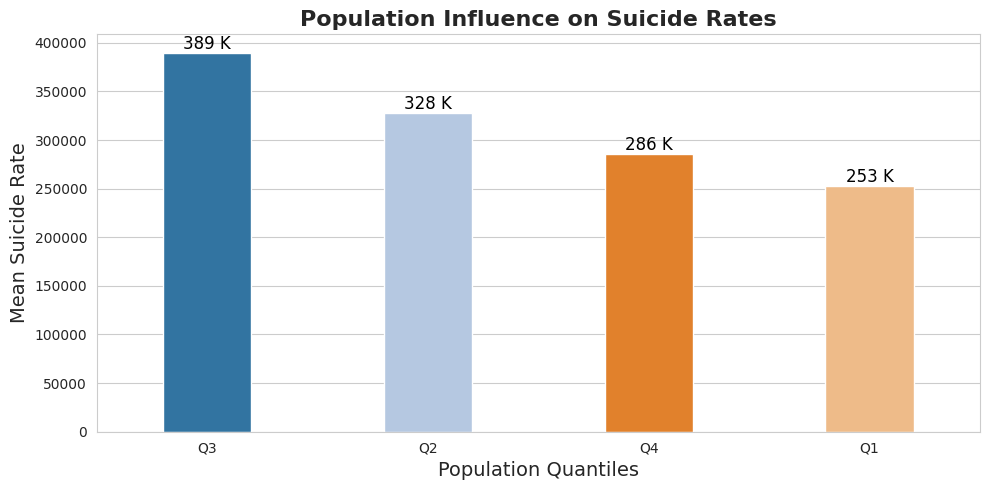

In [24]:
# Total Suicides by Population Quantiles
population_quantiles = pd.qcut(df['Population'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['population_quantile'] = population_quantiles

# Group by Population Quantiles and calculate mean of Suicides
population_influence = df.groupby('population_quantile', observed=False)['DeathRatePer100K'].sum().reset_index()

# Sort population_influence by 'DeathRatePer100K' in descending order
population_influence = population_influence.sort_values(by='DeathRatePer100K', ascending=False)

# Set a color palette
color_palette = 'tab20'

# Plotting the Population Influence
plt.figure(figsize=(10, 5))

# Use a clean whitegrid style
sns.set_style("whitegrid")

# Reduce bar width
bar_width = 0.4

sns.barplot(x='population_quantile', y='DeathRatePer100K',
            data=population_influence, palette=color_palette, order=population_influence['population_quantile'], width=bar_width)

# Add annotations to the bars
for index, value in enumerate(population_influence['DeathRatePer100K']):

    label = f"{value / 1e3:.0f} K"
    plt.text(index, value + 50, label, ha='center', va='bottom', fontsize=12, color='black')

# Set title and labels
plt.title('Population Influence on Suicide Rates', fontsize=16, fontweight='bold')
plt.xlabel('Population Quantiles', fontsize=14)
plt.ylabel('Mean Suicide Rate', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

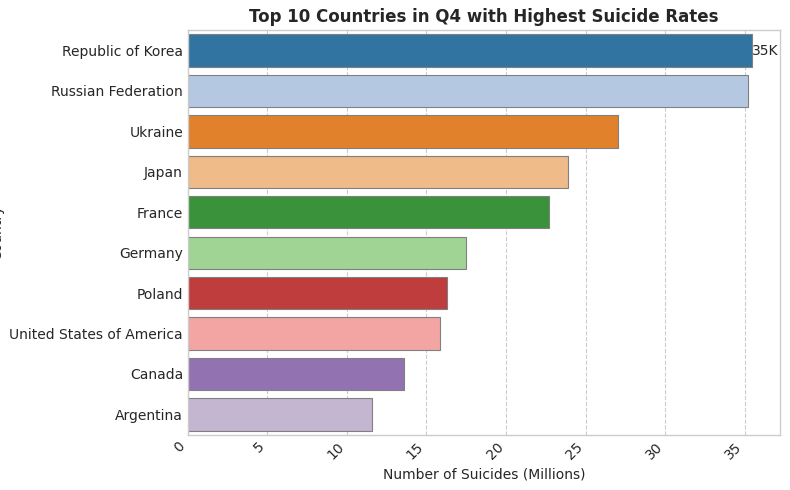

In [25]:
top_countries_q4 = (
    df[df["population_quantile"] == "Q4"]
    .groupby("CountryName")["DeathRatePer100K"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

color_palette = sns.color_palette("tab20")

with plt.style.context(("seaborn-v0_8-whitegrid", {"grid.linestyle": "--", "grid.color": "0.8"})):
    with plt.rc_context({"figure.figsize": (8, 5)}):
        ax = sns.barplot(
            x=top_countries_q4.values / 1e3,
            y=top_countries_q4.index,
            palette=color_palette,
            linewidth=0.8,
            edgecolor="gray",
            order=top_countries_q4.index,
        )
        ax.bar_label(ax.containers[0], fmt="{:,.0f}K")

        plt.title("Top 10 Countries in Q4 with Highest Suicide Rates", fontsize=12, fontweight="bold")
        plt.xlabel("Number of Suicides (Millions)", fontsize=10)
        plt.ylabel("Country", fontsize=10)

        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(fontsize=10)

        plt.subplots_adjust(left=0.2)
        plt.tight_layout()

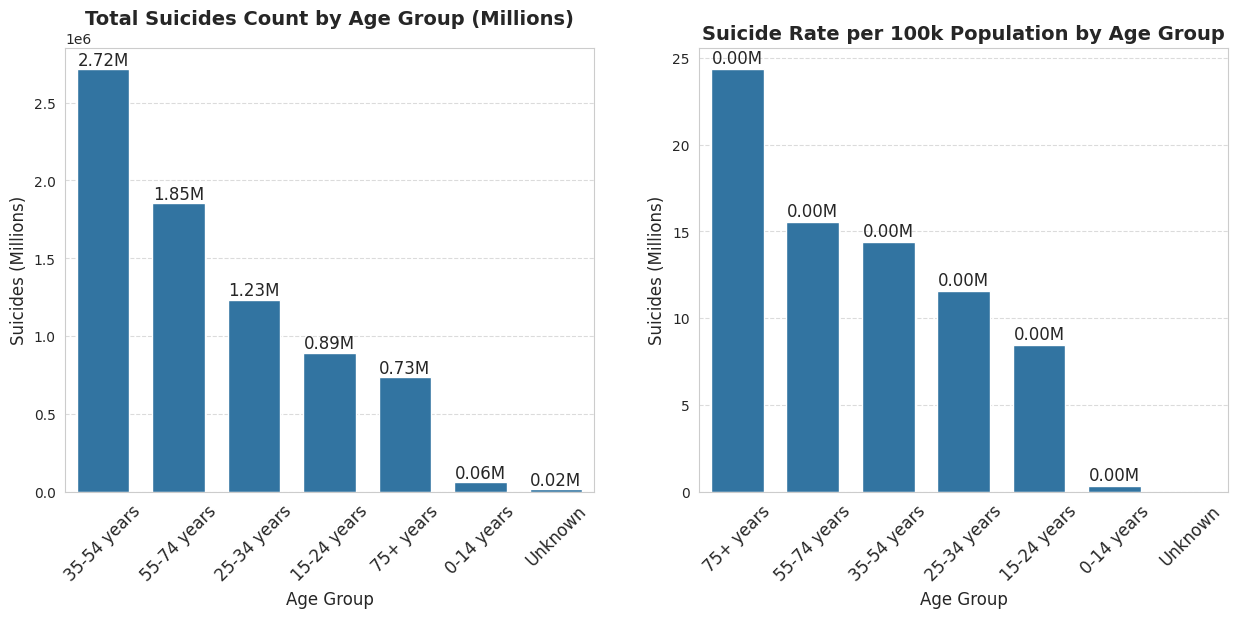

In [26]:
# Prepare data
generation_totals = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).reset_index()
generation_suicide_rate = df.groupby('AgeGroup')['DeathRatePer100K'].mean().sort_values(ascending=False).reset_index()

# Set Seaborn color palette
sns.set_palette("tab20")

# Set up figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplots_adjust(top=0.85)  # Adjust top margin for titles

# Customize styling
sns.set_style("whitegrid")  # Use Seaborn whitegrid style

# Plot barplots with data labels
sns.barplot(x='AgeGroup', y='SuicideCount', data=generation_totals, ax=axes[0], edgecolor='w', errorbar=None)
sns.barplot(x='AgeGroup', y='DeathRatePer100K', data=generation_suicide_rate, ax=axes[1], edgecolor='w', errorbar=None)

# Add labels above each bar showing millions
for ax in axes:
    for p in ax.patches:
        # Divide height by 1 million and show two decimal places
        label = format(p.get_height() / 1e6, '.2f') + 'M'
        ax.annotate(label,  # Use the formatted label
                    (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),  # Adjust offset as needed
                    ha='center', va='bottom', fontsize=12, fontweight='normal')

# Customize titles
axes[0].set_title("Total Suicides Count by Age Group (Millions)", fontsize=14, fontweight="bold")
axes[1].set_title("Suicide Rate per 100k Population by Age Group", fontsize=14, fontweight="bold")

# Customize y-axis labels
for ax in axes:
    # Update y-axis label to reflect millions
    ax.set_ylabel("Suicides (Millions)", fontsize=12)

# Customize x-axis labels and grid
for ax in axes:
    ax.set_xlabel('Age Group', fontsize=12)  # Add x-axis label
    ax.tick_params(axis='x', bottom=False, labelsize=12, labelrotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust bar widt
bar_width = 0.7
for ax in axes:
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - bar_width
        patch.set_width(bar_width)
        patch.set_x(patch.get_x() + diff * .5)

# Display plot
plt.show()

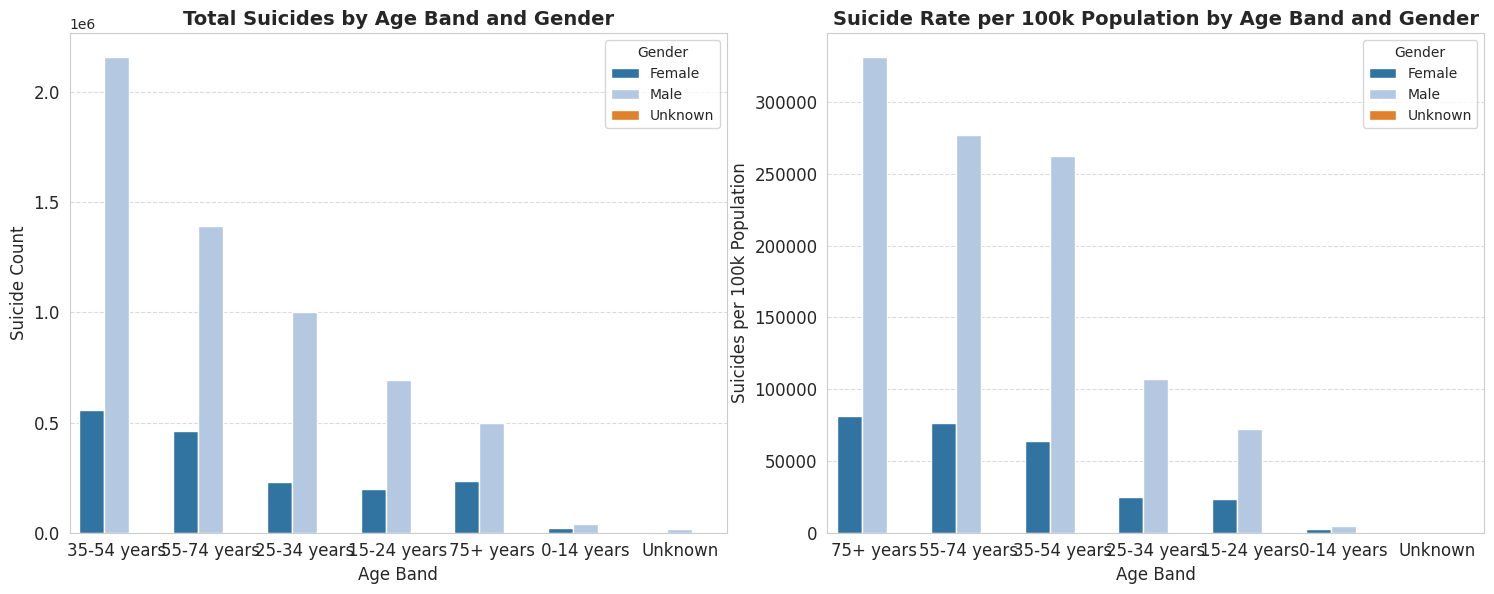

In [27]:
age_band_totals_count = df.groupby(['AgeGroup', 'Sex'])['SuicideCount'].sum().reset_index()
sorted_age_band_order = df.groupby('AgeGroup')['SuicideCount'].sum().sort_values(ascending=False).index

age_band_totals_rate = df.groupby(['AgeGroup', 'Sex'])['DeathRatePer100K'].sum().reset_index()
sorted_age_band_order_rate = df.groupby('AgeGroup')['DeathRatePer100K'].sum().sort_values(ascending=False).index

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Customize Seaborn style
sns.set_style("whitegrid")  # Use Seaborn whitegrid style

# Plot for Suicides Count by Age and Gender
sns.set_palette("tab20")
barplot_count = sns.barplot(
    x='AgeGroup',
    y='SuicideCount',
    hue='Sex',
    order=sorted_age_band_order,
    data=age_band_totals_count,
    errorbar=None,
    ax=axes[0]
)

# Customize titles and labels
axes[0].set_xlabel("Age Band", fontsize=12)
axes[0].set_ylabel("Suicide Count", fontsize=12)
axes[0].set_title("Total Suicides by Age Band and Gender", fontsize=14, fontweight="bold")
axes[0].legend(title='Gender', loc='upper right')

# Plot for Suicides per 100k Population by Age and Gender
sns.set_palette("tab20")  # Colorblind-friendly palette
barplot_rate = sns.barplot(
    x='AgeGroup',
    y='DeathRatePer100K',
    hue='Sex',
    order=sorted_age_band_order_rate,
    data=age_band_totals_rate,
    errorbar=None,
    ax=axes[1]
)

# Customize titles and labels
axes[1].set_xlabel("Age Band", fontsize=12)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=12)
axes[1].set_title("Suicide Rate per 100k Population by Age Band and Gender", fontsize=14, fontweight="bold")
axes[1].legend(title='Gender', loc='upper right')

# Adjust layout and grid
plt.tight_layout()  # Adjust spacing between plots and figure borders
for ax in axes:
    ax.tick_params(bottom=False, labelsize=12)  # Remove bottom ticks and adjust label size
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines with slight transparency

# Display plot
plt.show()

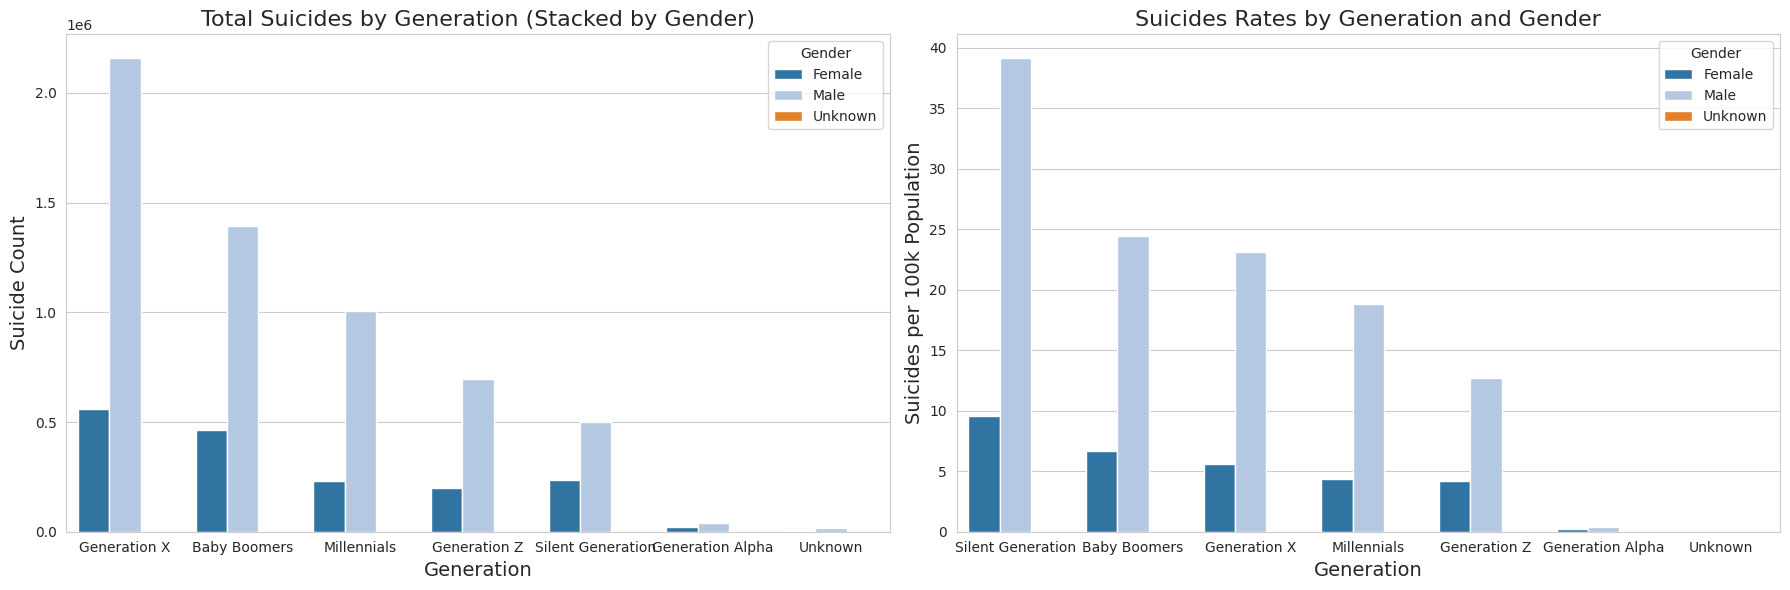

In [30]:
generation_totals_count = df.groupby(['Generation', 'Sex'])['SuicideCount'].sum().reset_index()
sorted_generation_order = df.groupby('Generation')['SuicideCount'].sum().sort_values(ascending=False).index

generation_totals_rate = df.groupby(['Generation', 'Sex'])['DeathRatePer100K'].mean().reset_index()
sorted_generation_pop_order = df.groupby('Generation')['DeathRatePer100K'].mean().sort_values(ascending=False).index

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Suicides by Generation and Gender
sns.set_palette("tab20")  # Colorblind-friendly palette
stacked_bar_count = sns.barplot(
    x='Generation',
    y='SuicideCount',
    hue='Sex',
    order=sorted_generation_order,
    data=generation_totals_count,
    errorbar=None,
    ax=axes[0]
)

# Set titles and labels
axes[0].set_xlabel("Generation", fontsize=14)
axes[0].set_ylabel("Suicide Count", fontsize=14)
axes[0].set_title("Total Suicides by Generation (Stacked by Gender)", fontsize=16)
axes[0].legend(title="Gender", loc="upper right")

# Plot 2: Suicides per 100k Population by Generation and Gender (Bar Chart)
sns.set_palette("tab20")
barplot_rate = sns.barplot(
    x='Generation',
    y='DeathRatePer100K',
    hue='Sex',
    order=sorted_generation_pop_order,
    data=generation_totals_rate,
    errorbar=None,
    ax=axes[1]
)


# Set titles and labels
axes[1].set_xlabel("Generation", fontsize=14)
axes[1].set_ylabel("Suicides per 100k Population", fontsize=14)
axes[1].set_title("Suicides Rates by Generation and Gender", fontsize=16)
axes[1].legend(title="Gender", loc="upper right")

# Adjust layout
plt.tight_layout()

plt.show()

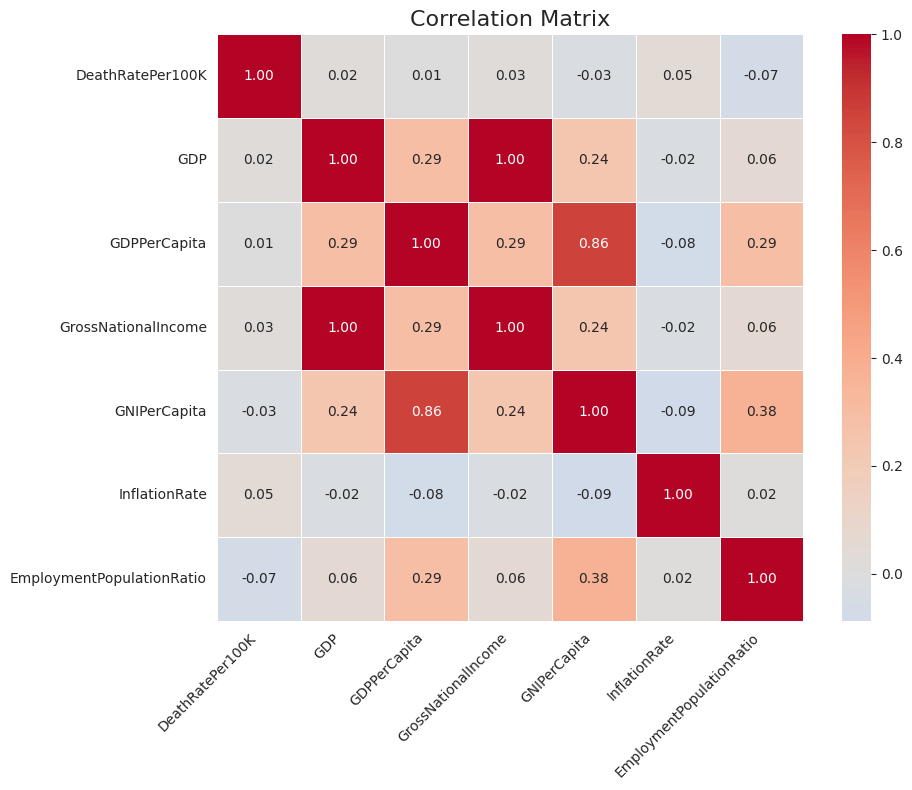

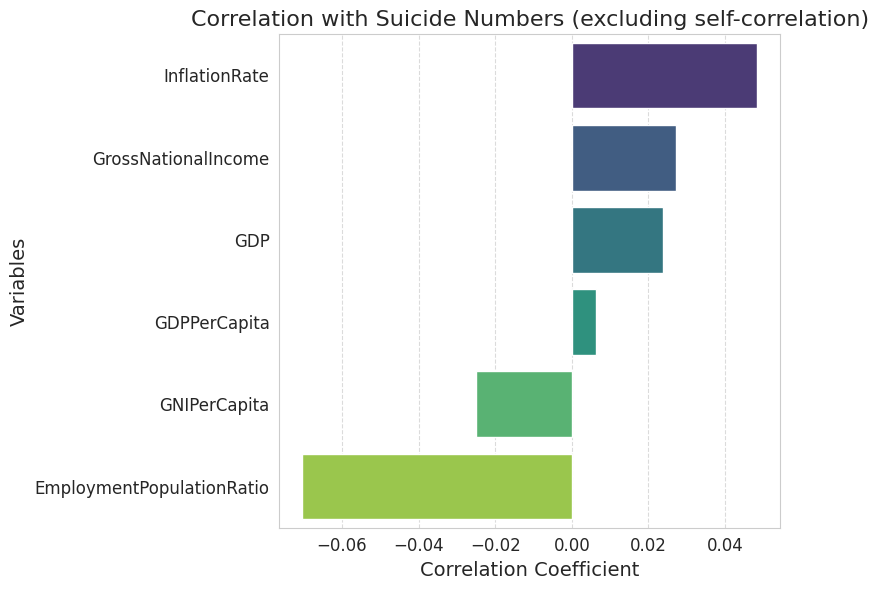

In [31]:
# Numeric columns
numeric_columns = ['DeathRatePer100K', 'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
                  'EmploymentPopulationRatio']

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",
    center=0,
    square=True,
)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analyze correlation with suicides, excluding self-correlation
correlation_with_suicides = correlation_matrix['DeathRatePer100K'].sort_values(ascending=False)[1:]

# Barplot for correlation with suicide numbers
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(
    x=correlation_with_suicides.values,
    y=correlation_with_suicides.index,
    palette='viridis'
)
plt.title('Correlation with Suicide Numbers (excluding self-correlation)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

1.   Most of the correlation coefficients are quite small, falling between -0.06 and 0.06. Typically, correlations below 0.3 or above -0.3 are considered weak or negligible correlations.
2.   The strongest negative correlation is around -0.06 for the Employment Population Ratio, suggesting a very weak negative relationship between higher employment and lower suicide numbers.
3.   The strongest positive correlation is around 0.06 for the Inflation Rate, indicating a very weak positive relationship between higher inflation and higher suicide numbers.
4.   All the other economic factors like GDP, GDP Per Capita, GNI Per Capita, and Gross National Income show even weaker correlations, with coefficients hovering around 0.
5. So in summary, while the directions of the correlations align with expected relationships (e.g. higher income associated with lower suicides), the actual strengths of these correlations with suicide numbers are very weak or negligible based on this data visualization. There do not appear to be any strong positive or strong negative correlations represented here between the listed economic factors and suicide rates.



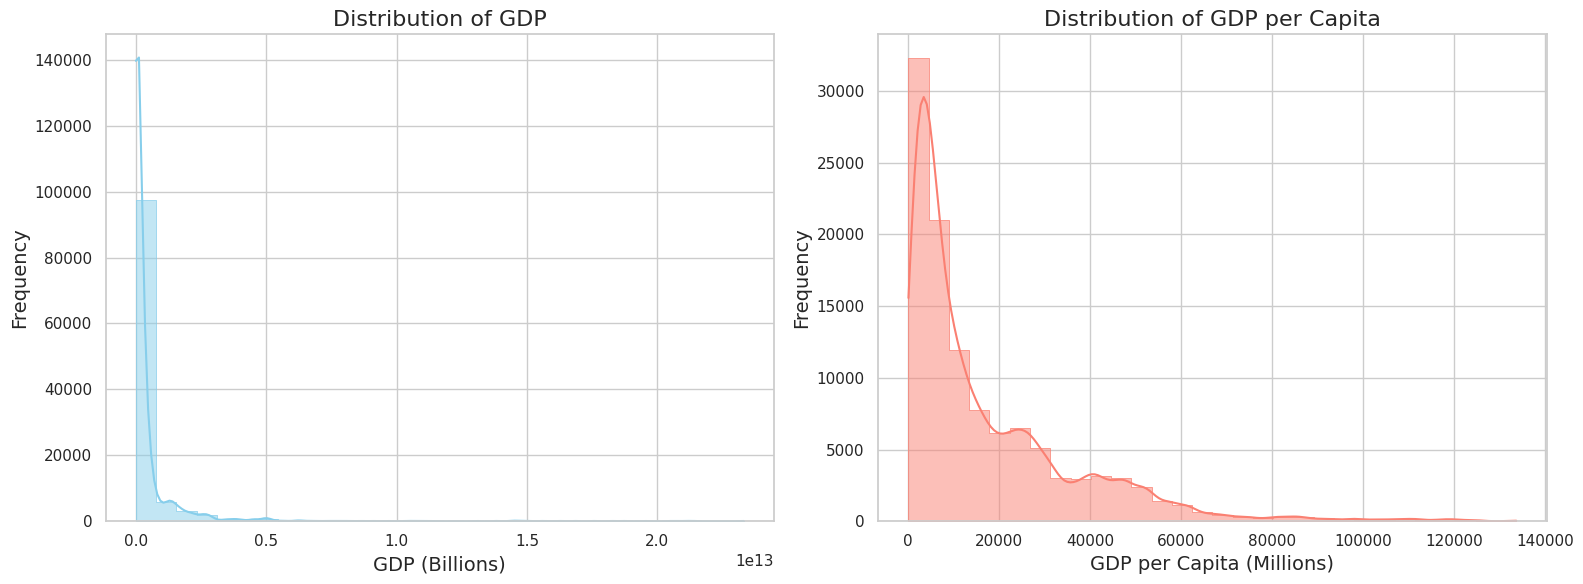

In [32]:
# Set Seaborn styling
sns.set(style="whitegrid", palette="viridis")

# Set up figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# GDP Distribution Analysis - GDP for Year
sns.histplot(df['GDP'], bins=30, kde=True, color='skyblue', label='GDP', element="step", linewidth=0.5, ax=axes[0])

# Set titles and labels
axes[0].set_title('Distribution of GDP', fontsize=16)
axes[0].set_xlabel('GDP (Billions)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# GDP Distribution Analysis - GDP per Capita
sns.histplot(df['GDPPerCapita'], bins=30, kde=True, color='salmon', label='GDP per Capita', element="step", linewidth=0.5, ax=axes[1])

# Set titles and labels
axes[1].set_title('Distribution of GDP per Capita', fontsize=16)
axes[1].set_xlabel('GDP per Capita (Millions)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# Display plot
plt.tight_layout()
plt.show()